In [1]:
import networkx as nx
import networkx.algorithms.isomorphism as iso
# import igraph as ig
# import graph_tool.all as gt

import time
import numpy as np
import matplotlib.pyplot as plt
import unittest

from homsearch_master.sub_iso import VF2

In [9]:
elist_1 = [(1,3), (1,4), (2,3), (2,4)]
elist_2 = [(1,4), (1,5), (1,6), (2,4), (2,5), (2,6), (3,4), (3,5), (3,6)] # complete bipartite

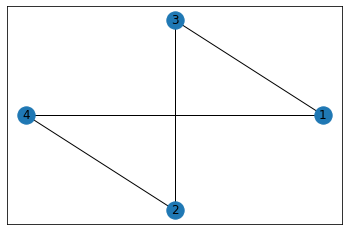

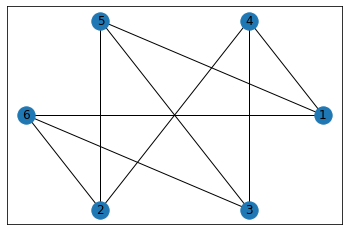

In [10]:
F_nx = nx.Graph()
F_nx.add_edges_from(ebunch_to_add=elist_1)
G_nx = nx.Graph()
G_nx.add_edges_from(ebunch_to_add=elist_2)

F_ig = ig.Graph.TupleList(edges=elist_1)
G_ig = ig.Graph.TupleList(edges=elist_2)

nx.draw_networkx(F_nx, pos=nx.circular_layout(F_nx))
plt.show()
nx.draw_networkx(G_nx, pos=nx.circular_layout(G_nx))
plt.show()

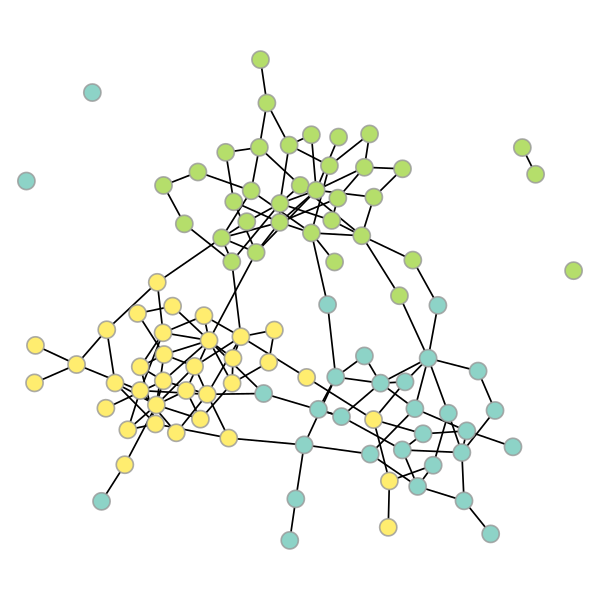

In [11]:
# generate random graph
def prob(a, b):
    if a == b:
        return 0.999
    else:
        return 0.001

g_gt, bm = gt.random_graph(100, lambda: np.random.poisson(3), directed=False,
                            model="blockmodel", block_membership=lambda: np.random.randint(3), edge_probs=prob)
gt.graph_draw(g_gt, vertex_fill_color=bm, edge_color="black")
plt.show()

elist = [(int(e.source()), int(e.target())) for e in g_gt.edges()]
g_nx = nx.Graph()
g_nx.add_edges_from(ebunch_to_add=elist)
g_ig = ig.Graph.TupleList(edges=elist)

In [13]:
# Networkx
assert VF2.count_isomorphisms_nx(F_nx, F_nx) == 8
assert VF2.count_subgraph_isomorphisms_nx(F_nx, G_nx) == 72

assert VF2.count_subgraph_monomorphisms_nx(F_nx, G_nx) == 72

assert VF2.count_subgraph_isomorphisms_nx(nx.path_graph(3), nx.complete_graph(4)) == 0
assert VF2.count_subgraph_monomorphisms_nx(nx.path_graph(3), nx.complete_graph(4)) == 24
assert VF2.count_subgraphs_nx(nx.path_graph(3), nx.complete_graph(4)) == 12
assert VF2.count_subgraphs_nx(nx.complete_graph(3), nx.complete_graph(4)) == 4

In [14]:
# igraph
assert VF2.count_subgraphs_ig(ig.Graph.Degree_Sequence([1, 2, 1]), ig.Graph.Full(4)) == \
       VF2.count_subgraphs_vf2_ig(ig.Graph.Degree_Sequence([1, 2, 1]), ig.Graph.Full(4)) == \
       VF2.count_subgraphs_lad_ig(ig.Graph.Degree_Sequence([1, 2, 1]), ig.Graph.Full(4)) == 12

assert VF2.count_subgraphs_nx(F_nx, G_nx) == VF2.count_subgraphs_ig(F_ig, G_ig) == \
       VF2.count_subgraphs_vf2_ig(F_ig, G_ig) == VF2.count_subgraphs_lad_ig(F_ig, G_ig) == 9

In [20]:
VF2.count_motif_ig(G_ig), VF2.count_motif_ig(G_ig, 4)

(18, 15)

In [23]:
VF2.count_motif_ig(g_ig), VF2.count_motif_ig(g_ig, 4)

(431, 1524)

In [15]:
# graphtool
assert VF2.count_subgraphs_gt(gt.complete_graph(3, self_loops=False, directed=False),
                              gt.complete_graph(10, self_loops=False, directed=False)) == 120

assert VF2.count_subgraphs_nx(nx.complete_graph(3), g_nx) == \
       VF2.count_subgraphs_ig(ig.Graph.Full(3), g_ig) == \
       VF2.count_subgraphs_vf2_ig(ig.Graph.Full(3), g_ig) == \
       VF2.count_subgraphs_lad_ig(ig.Graph.Full(3), g_ig) == \
       VF2.count_subgraphs_gt(gt.complete_graph(3), g_gt)

assert VF2.count_subgraphs_nx(nx.complete_graph(2), g_nx) == \
       VF2.count_subgraphs_ig(ig.Graph.Full(2), g_ig) == \
       VF2.count_subgraphs_vf2_ig(ig.Graph.Full(2), g_ig) == \
       VF2.count_subgraphs_lad_ig(ig.Graph.Full(2), g_ig) == \
       VF2.count_subgraphs_gt(gt.complete_graph(2), g_gt)

---
## Partition

In [1]:
import networkx as nx
import networkx.algorithms.isomorphism as iso
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

In [3]:
### greedy coloring
G = nx.path_graph(5)
d = nx.coloring.greedy_color(G, strategy='largest_first')
c = set()
for i in d.keys():
    c.add(d[i])
c

{0, 1}

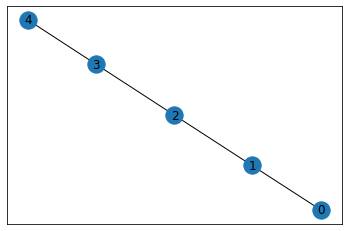

In [3]:
G = nx.path_graph(5)
nx.draw_networkx(G)

In [4]:
# 迭代：A+B+C...
# A: 给定一个图，将不相邻的两个点合并，并返回所有可能的partion列表
# B: partition list get node mapping list
# C: 给定原图和该图的partition列表，返回得到的新图列表 以及新图与原图点的对应 dict(key=node index of child_graph, value=correspongin list of node indices of orginal graph)
# D. 给定一组图，和一一对应的partition列表，合并isomorphic的图作为一个图，返回dict_1(key=graph, value=frequency), dict_2(key=graph, value=partition)


# partition: a list of sets
partition = [{v} for v in G.nodes()]
partition   # P0

[{0}, {1}, {2}, {3}, {4}]

In [5]:
def A(G):
    """
    Given a graph G, 
    combine every pair of nonadjacent nodes as a new node and get the corresponding node partition as a set of lists, 
    return all possible node partitions as a list.
    """
    partition_list = []  
#     for i in set(combinations(G.nodes, 2)) - set(G.edges):  # set of tuples
    for i in set(nx.non_edges(G)):
        partition = []
        partition.append(set(i))
        for v in set(G.nodes) - set(i):
            partition.append({v})
        partition_list.append(partition)
    return partition_list

In [6]:
partition_list = A(G)  # P1
partition_list

[[{1, 3}, {0}, {2}, {4}],
 [{1, 4}, {0}, {2}, {3}],
 [{2, 4}, {0}, {1}, {3}],
 [{0, 4}, {1}, {2}, {3}],
 [{0, 3}, {1}, {2}, {4}],
 [{0, 2}, {1}, {3}, {4}]]

In [7]:
def B(partition_list):
    """from partition list get node mapping list """
    node_mapping_list = []
    for partition in partition_list:
        g = nx.Graph()
        g.add_nodes_from(range(len(partition)))
        node_mapping = defaultdict(set)
        node_mapping.update(zip(g.nodes, partition))
        node_mapping_list.append(node_mapping)
    return node_mapping_list

In [8]:
node_mapping_list = B(partition_list)
node_mapping_list

[defaultdict(set, {0: {1, 3}, 1: {0}, 2: {2}, 3: {4}}),
 defaultdict(set, {0: {1, 4}, 1: {0}, 2: {2}, 3: {3}}),
 defaultdict(set, {0: {2, 4}, 1: {0}, 2: {1}, 3: {3}}),
 defaultdict(set, {0: {0, 4}, 1: {1}, 2: {2}, 3: {3}}),
 defaultdict(set, {0: {0, 3}, 1: {1}, 2: {2}, 3: {4}}),
 defaultdict(set, {0: {0, 2}, 1: {1}, 2: {3}, 3: {4}})]

In [9]:
def takeMin(elem):
    e = list(elem)
    e.sort()
    return e[0]

def C(G, node_mapping):
    """
    Given a graph, the node_mapping from its parent,
    generate its node partition list by A, 
    return a dict with generated graphs as the keys and parent-child node mappings as values
    and a dict with node partition of G as key and child graph as value
    """
    node_mapping_dict = {}   # node index: set(node indices)
    partition_dict = {}
    partition_list = A(G)
    node_mapping_list = B(partition_list)
    
    for i, partition in enumerate(partition_list):
        ### graph generation
        g = nx.Graph()
        g.add_nodes_from(range(len(partition)))   # nodes
        edge_list = list(combinations(g.nodes, 2))
        for e, edge in enumerate(combinations(partition, 2)):
            if G.subgraph(edge[0]|edge[1]).size() > 0:
                g.add_edges_from([edge_list[e]])   # edge
        ### final child-ancestor node mapping
        for k, v in node_mapping_list[i].items():
            node_mapping_list[i][k] = set.union(*[node_mapping[_] for _ in v])
        node_mapping_dict[g] = node_mapping_list[i]
        p = list(node_mapping_list[i].values())
        p.sort(key=takeMin)
        partition_dict[str(p)] = g
    
    return node_mapping_dict, partition_dict

defaultdict(<class 'set'>, {0: {1, 3}, 1: {0}, 2: {2}, 3: {4}}) : [{0}, {1, 3}, {2}, {4}]


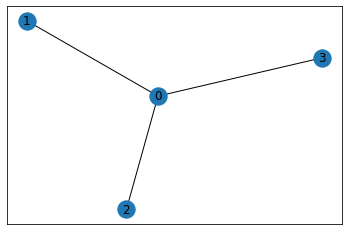

defaultdict(<class 'set'>, {0: {1, 4}, 1: {0}, 2: {2}, 3: {3}}) : [{0}, {1, 4}, {2}, {3}]


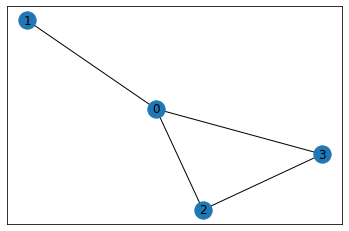

defaultdict(<class 'set'>, {0: {2, 4}, 1: {0}, 2: {1}, 3: {3}}) : [{0}, {1}, {2, 4}, {3}]


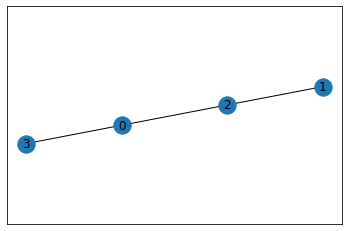

defaultdict(<class 'set'>, {0: {0, 4}, 1: {1}, 2: {2}, 3: {3}}) : [{0, 4}, {1}, {2}, {3}]


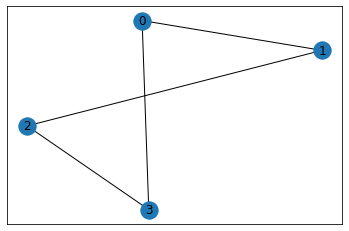

defaultdict(<class 'set'>, {0: {0, 3}, 1: {1}, 2: {2}, 3: {4}}) : [{0, 3}, {1}, {2}, {4}]


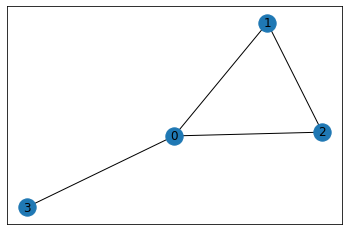

defaultdict(<class 'set'>, {0: {0, 2}, 1: {1}, 2: {3}, 3: {4}}) : [{0, 2}, {1}, {3}, {4}]


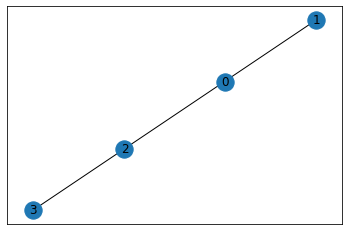

In [9]:
partition = [{v} for v in G.nodes()]   # P0
node_mapping = B([partition])[0]

node_mapping_dict, partition_dict = C(G, node_mapping)
for g in node_mapping_dict.keys():
    print(node_mapping_dict[g],':', list(partition_dict.keys())[list(partition_dict.values()).index(g)])
    nx.draw_networkx(g)
    plt.show()

In [10]:
def D(node_mapping_dict):
    """get next_node_mapping_dict and next_partition_dict"""
    graph_list = list(node_mapping_dict.keys())
    next_node_mapping_dict, next_partition_dict = {}, {}
    for g in graph_list:
        new_node_mapping_dict, new_partition_dict = C(g, node_mapping_dict[g])
        next_node_mapping_dict.update(new_node_mapping_dict)
        next_partition_dict.update(new_partition_dict)

    node_mapping_dict = {}
    for key, value in next_partition_dict.items(): 
        node_mapping_dict[value] = next_node_mapping_dict[value]
    return node_mapping_dict, next_partition_dict

defaultdict(<class 'set'>, {0: {1, 3}, 1: {0, 2}, 2: {4}}) : [{0, 2}, {1, 3}, {4}]


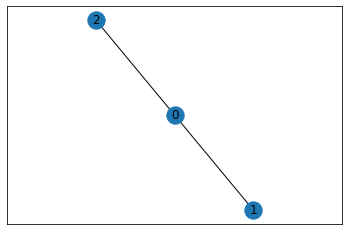

defaultdict(<class 'set'>, {0: {1, 3}, 1: {0, 4}, 2: {2}}) : [{0, 4}, {1, 3}, {2}]


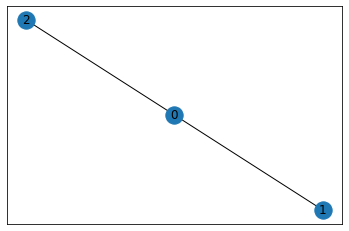

defaultdict(<class 'set'>, {0: {1, 3}, 1: {2, 4}, 2: {0}}) : [{0}, {1, 3}, {2, 4}]


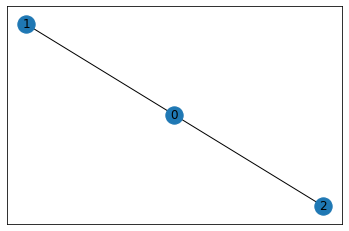

defaultdict(<class 'set'>, {0: {1, 4}, 1: {0, 2}, 2: {3}}) : [{0, 2}, {1, 4}, {3}]


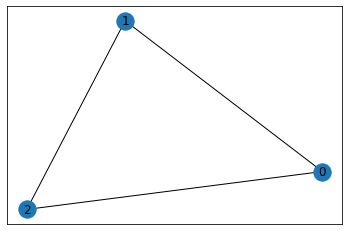

defaultdict(<class 'set'>, {0: {1, 4}, 1: {0, 3}, 2: {2}}) : [{0, 3}, {1, 4}, {2}]


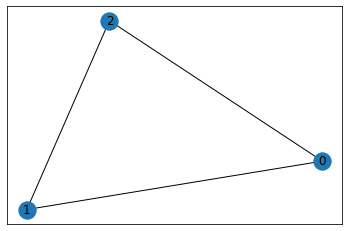

defaultdict(<class 'set'>, {0: {0, 2, 4}, 1: {1}, 2: {3}}) : [{0, 2, 4}, {1}, {3}]


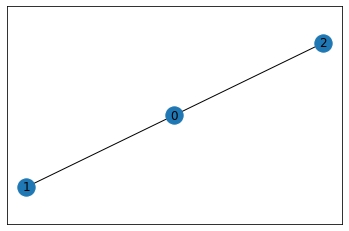

defaultdict(<class 'set'>, {0: {2, 4}, 1: {0, 3}, 2: {1}}) : [{0, 3}, {1}, {2, 4}]


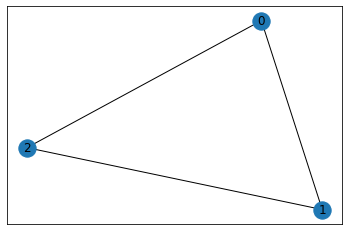

In [11]:
node_mapping_dict, partition_dict = D(node_mapping_dict)
for g in node_mapping_dict.keys():
    print(node_mapping_dict[g], ':', list(partition_dict.keys())[list(partition_dict.values()).index(g)])
    nx.draw_networkx(g)
    plt.show()

In [11]:
def E(node_mapping_dict):
    graph_list = list(node_mapping_dict.keys())
    
    while len(graph_list) > 0:
        g = graph_list[0]
        for g_ in graph_list[1:]:
            if nx.is_isomorphic(g, g_):
                node_mapping_dict.pop(g_)
                graph_list.remove(g_)
        graph_list.remove(g)
    
    return node_mapping_dict

defaultdict(<class 'set'>, {0: {1, 3}, 1: {0, 2}, 2: {4}})


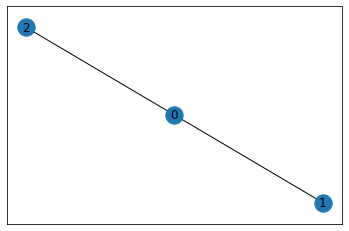

defaultdict(<class 'set'>, {0: {1, 4}, 1: {0, 2}, 2: {3}})


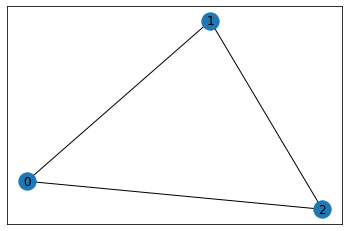

In [13]:
node_mapping_dict = E(node_mapping_dict)
for g in node_mapping_dict.keys():
    print(node_mapping_dict[g])
    nx.draw_networkx(g)
    plt.show()

In [12]:
### input: G
### output: node_mapping_dict_all by using graph as key and freq_dict_all
def partition(G):
    ### init
    # node_mapping_dict_all = {}
    partition_dict_all = {}
    ### G
    partition = [{v} for v in G.nodes()]   # P0
    partition_dict_all[str(partition)] = G
    node_mapping_dict = {G: B([partition])[0]}
    # node_mapping_dict_all.update(node_mapping_dict)
    partition_list = A(G)   # P1

    ### iteration
    while len(partition_list) > 0:
        node_mapping_dict, partition_dict = D(node_mapping_dict)
        partition_dict_all.update(partition_dict)
    #     node_mapping_dict_all.update(node_mapping_dict)

        partition_list = []
        for g in node_mapping_dict.keys():
            partition_list.extend(A(g))
    
    return partition_dict_all

[{0}, {1}, {2}, {3}, {4}]


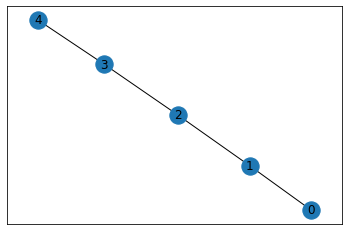

[{0}, {1, 3}, {2}, {4}]


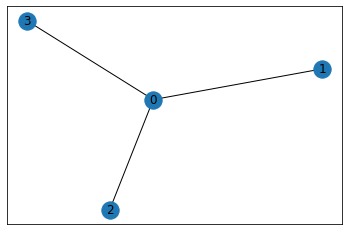

[{0}, {1, 4}, {2}, {3}]


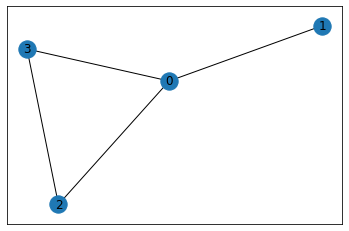

[{0}, {1}, {2, 4}, {3}]


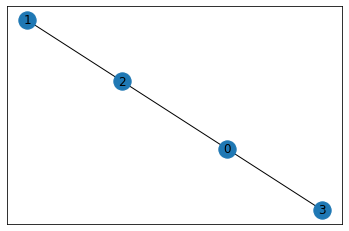

[{0, 4}, {1}, {2}, {3}]


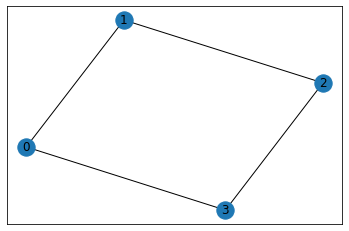

[{0, 3}, {1}, {2}, {4}]


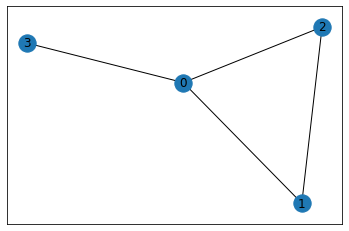

[{0, 2}, {1}, {3}, {4}]


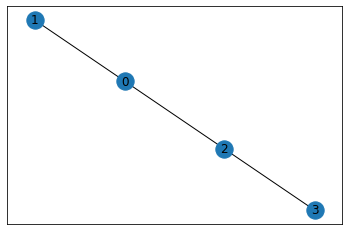

[{0, 2}, {1, 3}, {4}]


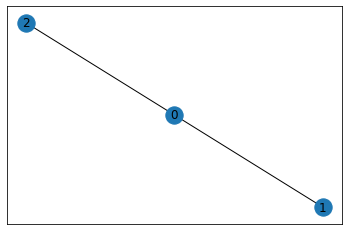

[{0, 4}, {1, 3}, {2}]


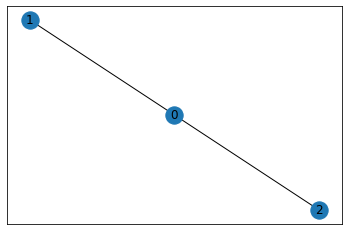

[{0}, {1, 3}, {2, 4}]


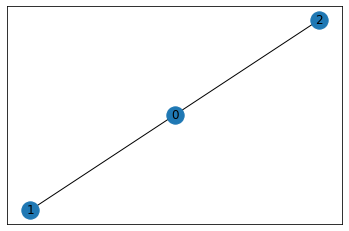

[{0, 2}, {1, 4}, {3}]


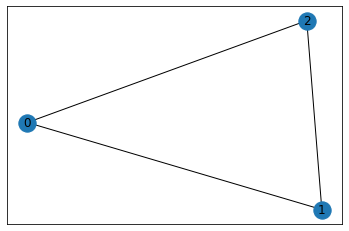

[{0, 3}, {1, 4}, {2}]


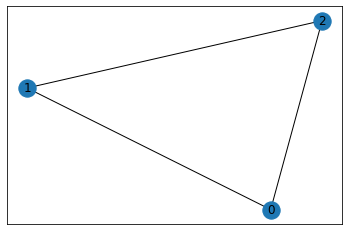

[{0, 2, 4}, {1}, {3}]


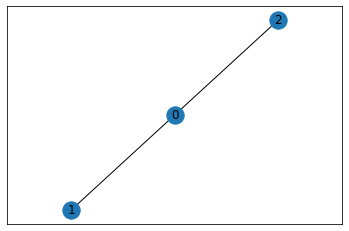

[{0, 3}, {1}, {2, 4}]


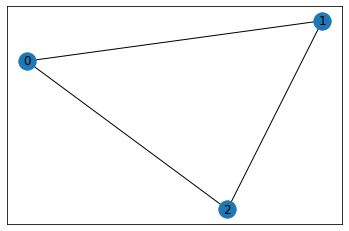

[{0, 2, 4}, {1, 3}]


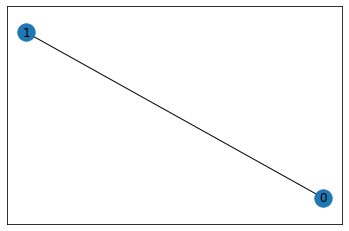

In [35]:
partition_dict_all = partition(G)
for k, v in  partition_dict_all.items():
    print(k)
    nx.draw_networkx(v)
    plt.show()

In [14]:
import math
def multiplier(partition_dict_all):
    partition_list = [eval(p) for p in list(partition_dict_all.keys())]
    num_v = len(partition_list[0])
    mul_list = [1]
    for p in partition_list[1:]:
        mul = 1
        for n in p:
            mul *= math.factorial(len(n)-1)
        mul_list.append((-1)**(num_v - len(p)) * mul)
    return mul_list

In [36]:
multiplier(partition_dict_all)

[1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 2, 1, -2]

### TODO: drop isomorphic graphs among partition(G) and add corresponding multipliers to avoid repeated #hom
1. graphs are grouped by |V| and |E|
2. check pair-wise isomorphisms
3. return new partition_dict and multiplier

In [43]:
def multiplier_dict(partition_dict_all):
    partition_list = [eval(p) for p in list(partition_dict_all.keys())]
    mul_list = multiplier_list(partition_list)
    mul_dict = dict(zip(partition_dict_all.keys(), mul_list))
    return mul_dict

In [44]:
mul_dict = multiplier_dict(partition_dict_all)
keys = dict()
for k, v in partition_dict_all.items():
    keys['{}_{}'.format(nx.number_of_nodes(v), nx.number_of_edges(v))] = []
for k, v in partition_dict_all.items():
    keys['{}_{}'.format(nx.number_of_nodes(v), nx.number_of_edges(v))].append(k)
v_e = set()
for k, v in keys.items():
    if len(v) > 1:
        v_e.add(k)

In [39]:
keys

{'5_4': ['[{0}, {1}, {2}, {3}, {4}]'],
 '4_3': ['[{0}, {1, 3}, {2}, {4}]',
  '[{0}, {1}, {2, 4}, {3}]',
  '[{0, 2}, {1}, {3}, {4}]'],
 '4_4': ['[{0}, {1, 4}, {2}, {3}]',
  '[{0, 4}, {1}, {2}, {3}]',
  '[{0, 3}, {1}, {2}, {4}]'],
 '3_2': ['[{0, 2}, {1, 3}, {4}]',
  '[{0, 4}, {1, 3}, {2}]',
  '[{0}, {1, 3}, {2, 4}]',
  '[{0, 2, 4}, {1}, {3}]'],
 '3_3': ['[{0, 2}, {1, 4}, {3}]',
  '[{0, 3}, {1, 4}, {2}]',
  '[{0, 3}, {1}, {2, 4}]'],
 '2_1': ['[{0, 2, 4}, {1, 3}]']}

In [40]:
checked = set()
while len(v_e) > 0:
    print(v_e)
    for k in v_e:
        count = 0
        for u, v in combinations(keys[k], 2):
            if nx.is_isomorphic(partition_dict_all[u], partition_dict_all[v]):
                partition_dict_all.pop(v, None)
                mul_dict[u] += mul_dict[v]
                mul_dict.pop(v, None)
                break
            else:
                count += 1
        if count == len(keys[k]) * (len(keys[k])-1) / 2: # no isomorphism
            checked.add(k) 
            
    print(checked)     

    keys = dict()
    for k, v in partition_dict_all.items():
        keys['{}_{}'.format(nx.number_of_nodes(v), nx.number_of_edges(v))] = []
    for k, v in partition_dict_all.items():
        keys['{}_{}'.format(nx.number_of_nodes(v), nx.number_of_edges(v))].append(k)
    print(keys)
    v_e = set()
    for k, v in keys.items():
        if len(v) > 1:
            v_e.add(k)
    v_e -= checked

{'3_3', '4_3', '4_4', '3_2'}
set()
{'5_4': ['[{0}, {1}, {2}, {3}, {4}]'], '4_3': ['[{0}, {1, 3}, {2}, {4}]', '[{0}, {1}, {2, 4}, {3}]'], '4_4': ['[{0}, {1, 4}, {2}, {3}]', '[{0, 4}, {1}, {2}, {3}]'], '3_2': ['[{0, 2}, {1, 3}, {4}]', '[{0}, {1, 3}, {2, 4}]', '[{0, 2, 4}, {1}, {3}]'], '3_3': ['[{0, 2}, {1, 4}, {3}]', '[{0, 3}, {1}, {2, 4}]'], '2_1': ['[{0, 2, 4}, {1, 3}]']}
{'3_3', '4_3', '4_4', '3_2'}
{'4_3', '4_4'}
{'5_4': ['[{0}, {1}, {2}, {3}, {4}]'], '4_3': ['[{0}, {1, 3}, {2}, {4}]', '[{0}, {1}, {2, 4}, {3}]'], '4_4': ['[{0}, {1, 4}, {2}, {3}]', '[{0, 4}, {1}, {2}, {3}]'], '3_2': ['[{0, 2}, {1, 3}, {4}]', '[{0, 2, 4}, {1}, {3}]'], '3_3': ['[{0, 2}, {1, 4}, {3}]'], '2_1': ['[{0, 2, 4}, {1, 3}]']}
{'3_2'}
{'4_3', '4_4'}
{'5_4': ['[{0}, {1}, {2}, {3}, {4}]'], '4_3': ['[{0}, {1, 3}, {2}, {4}]', '[{0}, {1}, {2, 4}, {3}]'], '4_4': ['[{0}, {1, 4}, {2}, {3}]', '[{0, 4}, {1}, {2}, {3}]'], '3_2': ['[{0, 2}, {1, 3}, {4}]'], '3_3': ['[{0, 2}, {1, 4}, {3}]'], '2_1': ['[{0, 2, 4}, {1, 3}]']}


In [41]:
mul_dict

{'[{0}, {1}, {2}, {3}, {4}]': 1,
 '[{0}, {1, 3}, {2}, {4}]': -1,
 '[{0}, {1, 4}, {2}, {3}]': -2,
 '[{0}, {1}, {2, 4}, {3}]': -2,
 '[{0, 4}, {1}, {2}, {3}]': -1,
 '[{0, 2}, {1, 3}, {4}]': 5,
 '[{0, 2}, {1, 4}, {3}]': 3,
 '[{0, 2, 4}, {1, 3}]': -2}

In [42]:
partition_dict_all

{'[{0}, {1}, {2}, {3}, {4}]': <networkx.classes.graph.Graph at 0x12135e5d0>,
 '[{0}, {1, 3}, {2}, {4}]': <networkx.classes.graph.Graph at 0x121ad9890>,
 '[{0}, {1, 4}, {2}, {3}]': <networkx.classes.graph.Graph at 0x12147ab90>,
 '[{0}, {1}, {2, 4}, {3}]': <networkx.classes.graph.Graph at 0x121ad9a10>,
 '[{0, 4}, {1}, {2}, {3}]': <networkx.classes.graph.Graph at 0x121ad98d0>,
 '[{0, 2}, {1, 3}, {4}]': <networkx.classes.graph.Graph at 0x121840290>,
 '[{0, 2}, {1, 4}, {3}]': <networkx.classes.graph.Graph at 0x121ad9e10>,
 '[{0, 2, 4}, {1, 3}]': <networkx.classes.graph.Graph at 0x121ad9110>}

### Tree Decomposition

In [1]:
import networkx as nx
from networkx.algorithms.approximation import treewidth
# treewidth.treewidth_min_degree()
# treewidth.treewidth_min_fill_in()
from homlib import Graph, hom

In [2]:
G = nx.fast_gnp_random_graph(10, 0.3)
nx.draw_networkx(G)

(2, None)

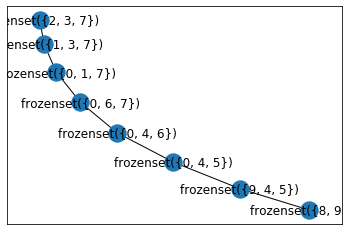

In [3]:
tw, td = treewidth.treewidth_min_degree(G)
tw, nx.draw_networkx(td)

### Load Data

In [50]:
import os
import networkx as nx

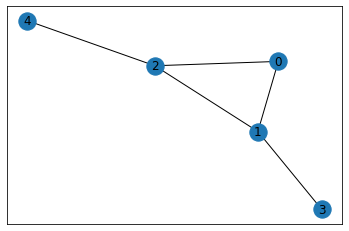

In [59]:
path = os.path.join(os.path.abspath("."), "dataset/vf3")
filename = os.path.join(path, 'H.grf')
H = nx.generators.small.bull_graph()
nx.draw_networkx(H)

In [82]:
### nx to grf
with open(filename,'w') as f:
    f.write(str(nx.number_of_nodes(H)))
    f.write('\n')
    for v in nx.nodes(H):
        f.write('%d %d'%(v, 1))
        f.write('\n')
    for v in nx.nodes(H):
        f.write(str(nx.degree(H, nbunch=v)))
        f.write('\n')
        for u in nx.neighbors(H, v):
            f.write('%d %d'%(v, u))
            f.write('\n')

In [83]:
with open(filename, 'r') as f:
    print(f.read())

5
0 1
1 1
2 1
3 1
4 1
2
0 1
0 2
3
1 0
1 2
1 3
3
2 0
2 1
2 4
1
3 1
1
4 2

